## Momentum adn NAG

#### Import numpy, matplotlib.pyplot and make it inline

In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, I'll generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [36]:
X = np.linspace(0,20)
a=-1
b=2
y = a*X+b

#### Ploting data points. 

In [37]:
print(X)
print(y)

[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]
[  2.           1.59183673   1.18367347   0.7755102    0.36734694
  -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
  -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
  -4.12244898  -4.53061224  -4.93877551  -5.34693878  -5.75510204
  -6.16326531  -6.57142857  -6.97959184  -7.3877551   -7.79591837
  -8.20408163  -8.6122449   -9.02040816  -9.42857143  -9.8367

#### Implementing Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coosing the suitable number of iterations, learning rate, and stop criteria.
#### Calculating r2 score
#### Ploting the some curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [38]:
def batch(input_data_x, target_labels_y, learning_rate, max_no_of_iterations):
    
    from numpy.linalg import norm
    
    theta0 = 0
    theta1 = 0
    theta0_list =[]
    theta1_list =[]
    hypothesis_list=[]
    losses = []
    cost_1= 1000
    m = len(input_data_x)
    actual_no_of_epochs = 1
    for i in range(max_no_of_iterations):
    

        hypothesis = theta0 + theta1 * input_data_x
        cost = (sum(hypothesis - target_labels_y)**2)/(2*m)
        gradient_0 = (sum(hypothesis - target_labels_y))/m
        gradient_1 = (sum(input_data_x*(hypothesis - target_labels_y)))/m
        theta0 = theta0 - learning_rate * gradient_0
        theta1 = theta1 - learning_rate * gradient_1
        gradient_vector = np.array([gradient_0, gradient_1])
        
        theta0_list.append(theta0)
        theta1_list.append(theta1)
        losses.append(cost)
        

        if norm(gradient_vector) <= 0.0001:
            break
        if abs(cost-cost_1) <= 0.0001:
            break
    
        cost_1 = cost
        actual_no_of_epochs += 1
        hypothesis = theta0 + theta1 * input_data_x
        hypothesis_list.append(hypothesis)
    
    return theta0_list, theta1_list, losses, hypothesis_list, theta0, theta1 ,actual_no_of_epochs
            


In [39]:
out_put = batch(X, y, 0.0001, 1000)
theta0_list = out_put[0]
theta1_list = out_put[1]
losses = out_put[2]
hypothesis_list = out_put[3]
theta0 = out_put[4]
theta1 = out_put[5]
no_of_epochs = out_put[6]
y_predicted = theta0 + theta1 * X
print(no_of_epochs)

649


In [40]:
from sklearn.metrics import r2_score
r2 = r2_score(y,y_predicted)
print(r2)

0.9694365204261454


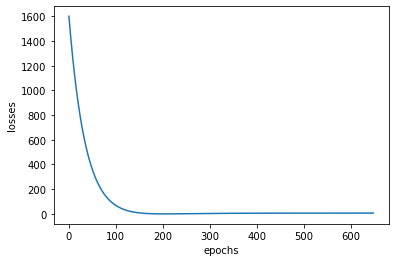

In [41]:
epochs_ = np.arange(0, no_of_epochs)
plt.plot(epochs_, losses)
plt.xlabel('epochs')
plt.ylabel('losses')
plt.show()

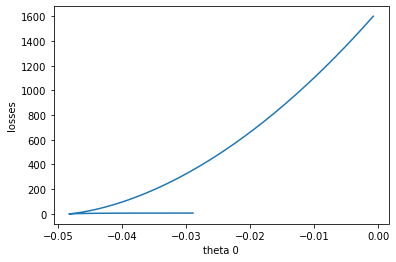

In [42]:
plt.plot(theta0_list, losses)
plt.xlabel('theta 0')
plt.ylabel('losses')
plt.show()

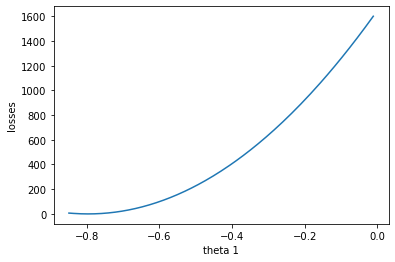

In [43]:
plt.plot(theta1_list, losses)
plt.xlabel('theta 1')
plt.ylabel('losses')
plt.show()

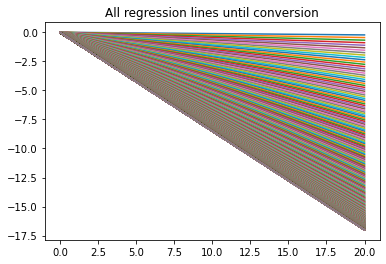

In [45]:
for w in range(no_of_epochs-1):
    line = hypothesis_list[w]
    plt.plot(X, line)
    
plt.title('All regression lines until conversion')
plt.show()

In [46]:
best_fit = theta0 + theta1 *X

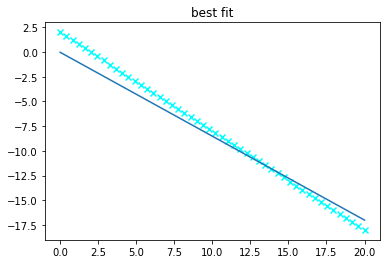

In [47]:
plt.plot(X, best_fit)
plt.scatter(X, y, marker = 'x', c='cyan')
plt.title('best fit')
plt.show()

### Updating Batch GD for one variable  implementation to be Momentum-Based GD and checking results

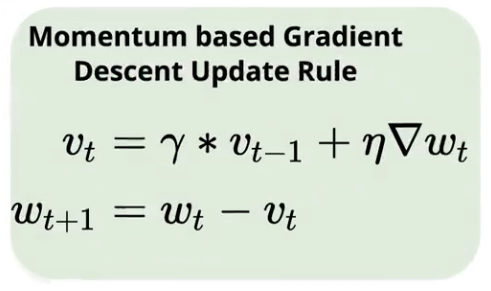

#### γ takes values between 0 and 1.
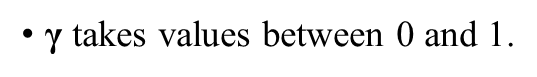

In [48]:
def momentum(input_data_x, target_labels_y, learning_rate, max_no_of_iterations, gamma):
    
    from numpy.linalg import norm
    
    vt0 = 0
    vt1 = 0
    theta0 = 0
    theta1 = 0
    theta0_list =[]
    theta1_list =[]
    hypothesis_list=[]
    losses = []
    cost_1= 1000
    m = len(input_data_x)
    actual_no_of_epochs = 0
    for i in range(max_no_of_iterations):
    

        hypothesis = theta0 + theta1 * input_data_x
        cost = (sum(hypothesis - target_labels_y)**2)/(2*m)
        gradient_0 = (sum(hypothesis - target_labels_y))/m
        gradient_1 = (sum(input_data_x*(hypothesis - target_labels_y)))/m

        vt0 = gamma * vt0 +  learning_rate * gradient_0
        vt1 = gamma * vt1 +  learning_rate * gradient_1
        
        theta0 = theta0 - vt0
        theta1 = theta1 - vt1
        
        gradient_vector = np.array([gradient_0, gradient_1])
        
        theta0_list.append(theta0)
        theta1_list.append(theta1)
        losses.append(cost)
        

        if norm(gradient_vector) <= 0.0001:
            break
        if abs(cost-cost_1) <= 0.0001:
            break
    
        cost_1 = cost
        actual_no_of_epochs += 1
        hypothesis = theta0 + theta1 * input_data_x
        hypothesis_list.append(hypothesis)
    
    return theta0_list, theta1_list, losses, hypothesis_list, theta0, theta1 ,actual_no_of_epochs
            


In [49]:
out_put_m = momentum(X, y, 0.0001, 1000, 0.9)
theta0_list_m = out_put_m[0]
theta1_list_m = out_put_m[1]
losses_m = out_put_m[2]
hypothesis_list_m = out_put_m[3]
theta0_m = out_put_m[4]
theta1_m = out_put_m[5]
no_of_epochs_m = out_put_m[6]
y_predicted_m = theta0_m + theta1_m * X
print(no_of_epochs_m)

1000


In [50]:
r2 = r2_score(y,y_predicted_m)
print(r2)

0.9810060783394076


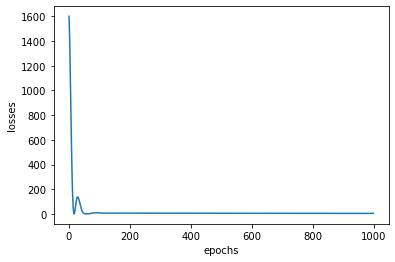

In [51]:
epochs__ = np.arange(0, no_of_epochs_m)
plt.plot(epochs__, losses_m)
plt.xlabel('epochs')
plt.ylabel('losses')
plt.show()

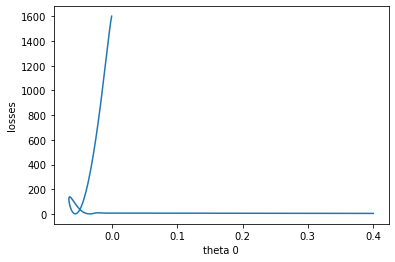

In [52]:
plt.plot(theta0_list_m, losses_m)
plt.xlabel('theta 0')
plt.ylabel('losses')
plt.show()

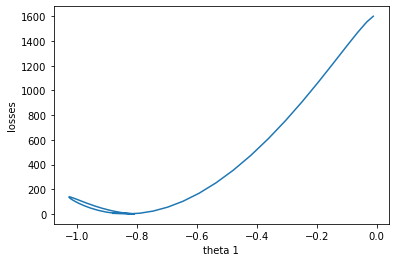

In [53]:
plt.plot(theta1_list_m, losses_m)
plt.xlabel('theta 1')
plt.ylabel('losses')
plt.show()

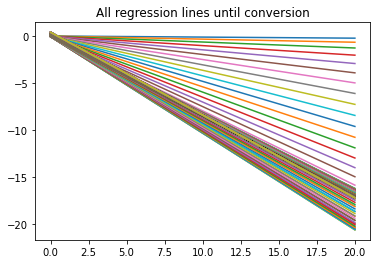

In [54]:
for r in range(no_of_epochs_m -1):
    line_m = hypothesis_list_m[r]
    plt.plot(X, line_m)
    
plt.title('All regression lines until conversion')
plt.show()

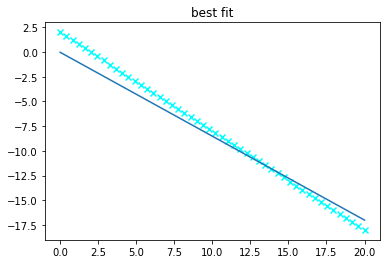

In [55]:
best_fit_m = theta0 + theta1 * X
plt.plot(X, best_fit_m)
plt.scatter(X, y, marker = 'x', c='cyan')
plt.title('best fit')
plt.show()

#### Trying another values of momentum term and checking reults.
#### Trying very large values close to one and very small values close to zero. 
#### Trying momentum = 0

In [56]:
out_put_2 = momentum(X, y, 0.0001, 1000, 0.95)

no_of_epochs_2 = out_put_2[6]

print(no_of_epochs_2)

1000


In [57]:
out_put_3 = momentum(X, y, 0.0001, 1000, 0.5)

no_of_epochs_3 = out_put_3[6]

print(no_of_epochs_3)

319


In [58]:
out_put_4 = momentum(X, y, 0.0001, 1000, 0.1)

no_of_epochs_4 = out_put_4[6]

print(no_of_epochs_4)

583


In [59]:
out_put_5 = momentum(X, y, 0.0001, 1000, 0)

no_of_epochs_5 = out_put_5[6]

print(no_of_epochs_5)

648


### Updating Batch GD for one variable  implementation to be NAG and checking results

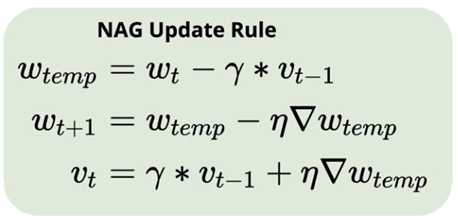

In [60]:
def NAG(input_data_x, target_labels_y, learning_rate, max_no_of_iterations, gamma):
    
    from numpy.linalg import norm
    vt0 = 0 
    vt1 = 0
    theta0 = 0
    theta1 = 0
    theta0_list =[]
    theta1_list =[]
    hypothesis_list=[]
    losses = []
    cost_1= 1000
    m = len(input_data_x)
    actual_no_of_epochs = 0
    for i in range(max_no_of_iterations):
    

        hypothesis = theta0 + theta1 * input_data_x
        cost = (sum(hypothesis - target_labels_y)**2)/(2*m)
        gradient_0 = (sum(hypothesis - target_labels_y))/m
        gradient_1 = (sum(input_data_x*(hypothesis - target_labels_y)))/m
        theta0temp = theta0 - gamma * vt0
        theta1temp = theta1 - gamma * vt1

        theta0 = theta0temp - learning_rate * gradient_0
        theta1 = theta1temp - learning_rate * gradient_1
        
        vt0 = gamma * vt0 +  learning_rate * gradient_0
        vt1 = gamma * vt1 +  learning_rate * gradient_1
        
        theta0 = theta0 - vt0
        theta1 = theta1 - vt1
        
        gradient_vector = np.array([gradient_0, gradient_1])
        
        theta0_list.append(theta0)
        theta1_list.append(theta1)
        losses.append(cost)
        

        if norm(gradient_vector) <= 0.0001:
            break
        if abs(cost-cost_1) <= 0.0001:
            break
    
        cost_1 = cost
        actual_no_of_epochs += 1
        hypothesis = theta0 + theta1 * input_data_x
        hypothesis_list.append(hypothesis)
    
    return theta0_list, theta1_list, losses, hypothesis_list, theta0, theta1 ,actual_no_of_epochs
            


In [61]:
out_put_n = NAG(X, y, 0.0001, 10000, 0.9)
theta0_list_n = out_put_n[0]
theta1_list_n = out_put_n[1]
losses_n = out_put_n[2]
hypothesis_list_n = out_put_n[3]
theta0_n = out_put_n[4]
theta1_n = out_put_n[5]
no_of_epochs_n = out_put_n[6]
y_predicted_n = theta0_n + theta1_n * X
print(no_of_epochs_n)

163
